<a href="https://colab.research.google.com/github/Tashika-Wijesooriya/DL-lab-2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [5 4 0 2 4 7 7 8 5 3]


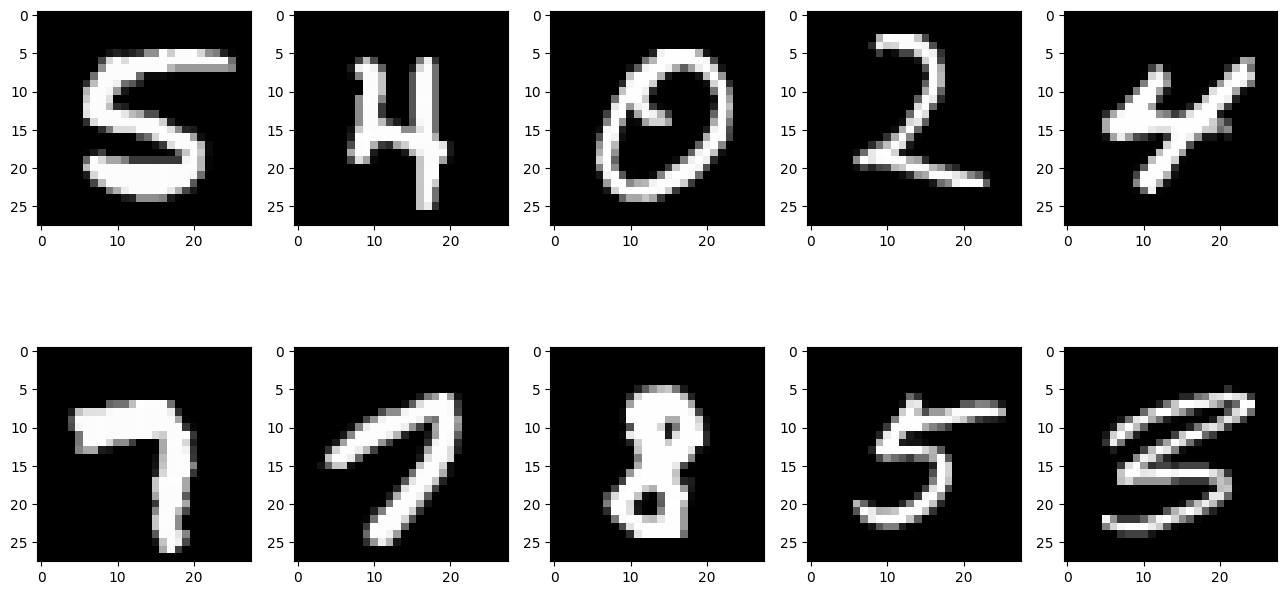

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8439 - loss: 0.5136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9720 - loss: 0.0931
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9794 - loss: 0.0695
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0556
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9836 - loss: 0.0515
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0355
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0273


Plot the loss and accuracy graphs

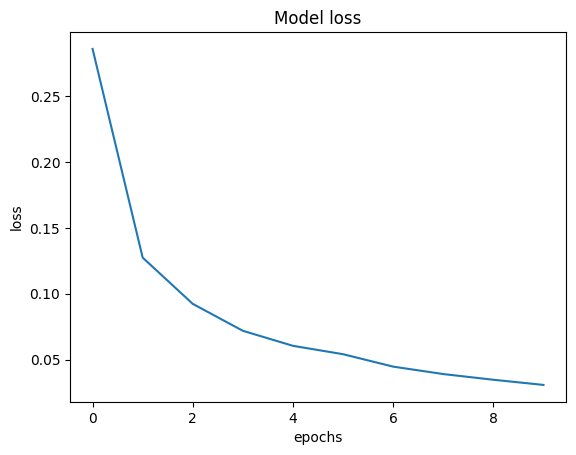

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

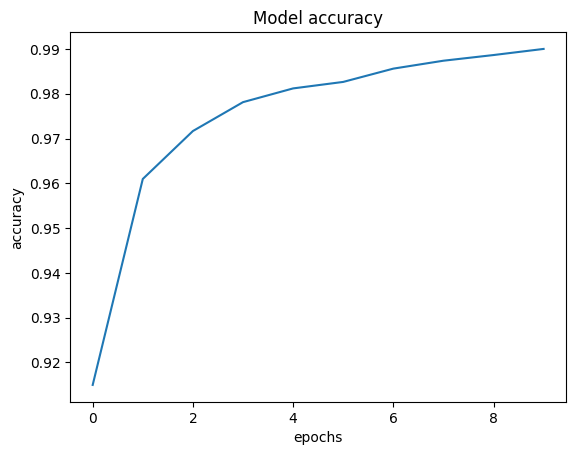

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1479
Loss of the Test dataset is: 0.11842811107635498
Accuracy of the test dataset is: 0.9695000052452087


Save the model weights

In [12]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')


a. Improve the test accuracy of the model by changing the hyperparameters.


In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [14]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # default is 0.001, can try 0.0005
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [15]:
train_info = model.fit(new_train_data, new_train_target, epochs=25, batch_size=128, validation_split=0.2)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8237 - loss: 0.6096 - val_accuracy: 0.9581 - val_loss: 0.1411
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9615 - loss: 0.1279 - val_accuracy: 0.9707 - val_loss: 0.1050
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9757 - loss: 0.0789 - val_accuracy: 0.9714 - val_loss: 0.0938
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9841 - loss: 0.0506 - val_accuracy: 0.9732 - val_loss: 0.0920
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9760 - val_loss: 0.0832
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9748 - val_loss: 0.0843
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0.9779 - val_loss: 0.0866
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 

In [16]:
from tensorflow.keras.layers import Dropout

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))


In [17]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Test loss: {loss}, Test accuracy: {acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.1267
Test loss: 0.10812156647443771, Test accuracy: 0.9799000024795532


b. Add L1 and L2 regularization terms to the model and retrain the model.

In [18]:
from tensorflow.keras import regularizers


In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Dense layers with L1 + L2 regularization
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(10, activation='softmax'))


In [20]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [21]:
train_info = model.fit(new_train_data, new_train_target,
                       epochs=25, batch_size=128, validation_split=0.2)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8226 - loss: 0.7579 - val_accuracy: 0.9572 - val_loss: 0.2653
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9597 - loss: 0.2458 - val_accuracy: 0.9669 - val_loss: 0.2225
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9741 - loss: 0.1971 - val_accuracy: 0.9663 - val_loss: 0.2196
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9796 - loss: 0.1706 - val_accuracy: 0.9727 - val_loss: 0.1873
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9837 - loss: 0.1558 - val_accuracy: 0.9704 - val_loss: 0.1962
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9878 - loss: 0.1394 - val_accuracy: 0.9722 - val_loss: 0.1910
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9877 - loss: 0.1342 - val_accuracy: 0.9736 - val_loss: 0.1832
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9898 - loss: 0.1271 - val_accur

In [22]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Test loss: {loss}, Test accuracy: {acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.1354
Test loss: 0.12247677892446518, Test accuracy: 0.98089998960495


c. Visualize class-wise test dataset performance using a confusion matrix.

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [24]:
y_pred_probs = model.predict(new_test_data)  # shape: (10000, 10)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(new_test_target, axis=1)  # convert one-hot to integer labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
cm = confusion_matrix(y_true, y_pred)


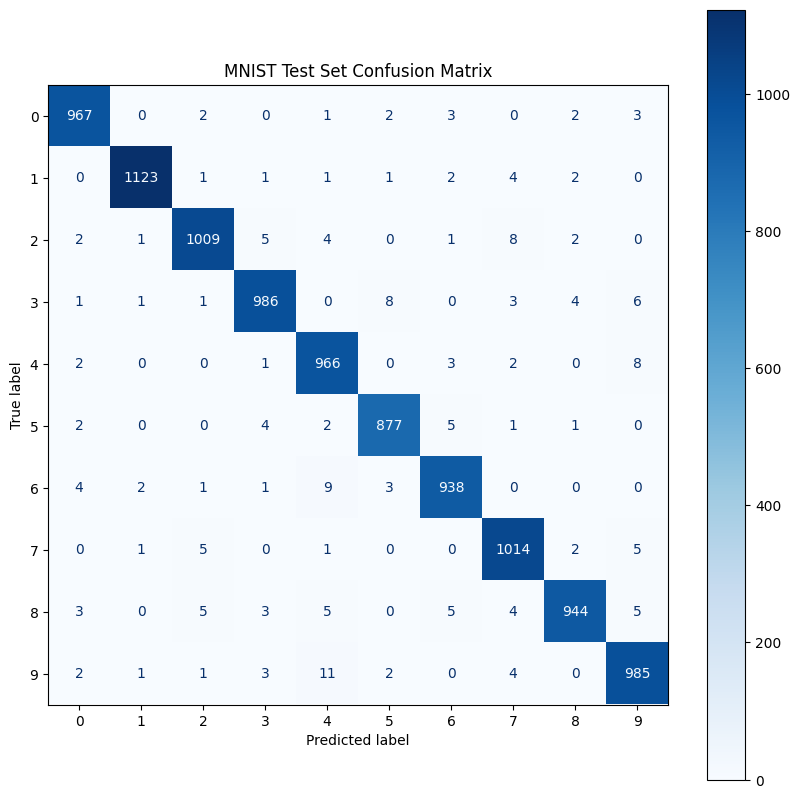

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("MNIST Test Set Confusion Matrix")
plt.show()
